In [3]:
import matplotlib.pyplot as plt
import matplotlib  as mpl
import pickle
import os
import numpy as np

from gldpy import GLD

from scipy import stats

import tqdm
import contextlib
import time

from mycolorpy import colorlist as mcp
import proplot as pplt

# Plotting parameters
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["legend.fontsize"] = 12.5
mpl.rcParams["font.size"] = 13.5
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.alpha"] = 0.3
mpl.rcParams["axes.axisbelow"] = True
mpl.rcParams["figure.figsize"] = (6, 4)
mpl.rcParams["mathtext.fontset"] = "cm"
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.titlesize'] = 15

USE_TEX = False

if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
    
plt.rc("font", family="serif")
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]



/var/folders/hg/g0dmwys902d4l16w6vd0n3qr0000gn/T/ipykernel_9497/2327781423.py:41: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [4]:
with open('data/data_sugarscape/Sobol/output_array/SC_pop100_results_all_array.pickle', 'rb') as f:
    results = pickle.load(f)

In [5]:
if not os.path.exists('data/data_sugarscape/GLD_fits'):
    os.makedirs('data/data_sugarscape/GLD_fits') 

##  Fit GLD of FMKL parameteriation using different methods of estimating parameters

In [4]:
gld = GLD('FMKL')

### Method of L-moments (LMM)

In [6]:
if not os.path.exists(f'data/data_sugarscape/GLD_fits/LMM_fit_time.pickle'):
    lambdas_LMM = []

    start = time.time()
    for i in tqdm.tqdm(range(results[0][500].shape[1])):
        data=results[0][500][:, i]

        with contextlib.redirect_stdout(None):
            param_LMM = gld.fit_LMM(data,[0.5,0.5], disp_fit = False, 
                                    maxiter=1000, maxfun=1000)
            lambdas_LMM.append(param_LMM)

    end = time.time()

    LMM_time = end - start
    print(f"Done! LMM took: {LMM_time}")

    lambdas_array_LMM = np.asarray(lambdas_LMM)
    
    with open(f"data/data_sugarscape/GLD_fits/LMM_fit_time.pickle", "wb") as f:
        pickle.dump((lambdas_array_LMM, LMM_time), f)
        
else:
    with open('data/data_sugarscape/GLD_fits/LMM_fit_time.pickle', 'rb') as f:
        LMM = pickle.load(f)
        

### Method of moments (MM)

In [7]:
if not os.path.exists(f'data/data_sugarscape/GLD_fits/MM_fit_time.pickle'):
    
    lambdas_MM = []

    start = time.time()
    for i in tqdm.tqdm(range(results[0][500].shape[1])):
        data=results[0][500][:, i]

        with contextlib.redirect_stdout(None):
            params_MM = gld.fit_MM(data, [0.5, 1], 
                               disp_fit = False, maxiter=1000, maxfun=1000)
            lambdas_MM.append(params_MM)

    end = time.time()
    
    MM_time = end - start
    print(f"Done! MM took: {MM_time}")

    lambdas_array_MM = np.asarray(lambdas_MM)
    
    with open(f"data/data_sugarscape/GLD_fits/MM_fit_time.pickle", "wb") as f:
        pickle.dump((lambdas_array_MM, MM_time), f)
        
else:
    with open('data/data_sugarscape/GLD_fits/MM_fit_time.pickle', 'rb') as f:
        MM = pickle.load(f)

### Method of percentiles (PM)

In [8]:
if not os.path.exists(f'data/data_sugarscape/GLD_fits/PM_fit_time.pickle'):
    
    lambdas_PM = []

    start = time.time()
    for i in tqdm.tqdm(range(results[0][500].shape[1])):
        data=results[0][500][:, i]

        with contextlib.redirect_stdout(None):
            param_PM = gld.fit_PM(data, [0.1,0.1], disp_fit = False, maxiter=1000, maxfun=1000)
            
            lambdas_PM.append(param_PM)

    end = time.time()
    
    PM_time = end - start
    
    print(f"Done! PM took: {PM_time}")

    lambdas_array_PM = np.asarray(lambdas_PM)
    
    with open(f"data/data_sugarscape/GLD_fits/PM_fit_time.pickle", "wb") as f:
        pickle.dump((lambdas_array_PM, PM_time), f)
        
else:
    with open('data/data_sugarscape/GLD_fits/PM_fit_time.pickle', 'rb') as f:
        PM = pickle.load(f)

### Method of maximum likelihood (ML)

- initial values for optimisation are estimated by method of L-moments (LMM)

In [9]:
if not os.path.exists(f'data/data_sugarscape/GLD_fits/ML_LMM_fit_time.pickle'):
    
    lambdas_ML_LMM = []

    start = time.time()
    for i in tqdm.tqdm(range(results[0][500].shape[1])):
        data=results[0][500][:, i]

        with contextlib.redirect_stdout(None):
            param_ML_LMM = gld.fit_ML(data,[0.1,0.1], method = 'LMM', disp_fit = False, 
                                  maxiter=1000, maxfun=1000)
            lambdas_ML_LMM.append(param_ML_LMM)

    end = time.time()
    
    ML_LMM_time = end - start
    print(f"Done! ML took: {ML_LMM_time}")

    lambdas_array_ML_LMM = np.asarray(lambdas_ML_LMM)
    
    with open(f"data/data_sugarscape/GLD_fits/ML_LMM_fit_time.pickle", "wb") as f:
        pickle.dump((lambdas_array_ML_LMM, ML_LMM_time), f)
        
else:
    with open('data/data_sugarscape/GLD_fits/ML_LMM_fit_time.pickle', 'rb') as f:
        ML_LMM = pickle.load(f)
        

- initial values for optimisation are estimated by method of moments (MM)

In [10]:
if not os.path.exists(f'data/data_sugarscape/GLD_fits/ML_MM_fit_time.pickle'):
    
    lambdas_ML_MM = []

    start = time.time()
    for i in tqdm.tqdm(range(results[0][500].shape[1])):
        data=results[0][500][:, i]

        with contextlib.redirect_stdout(None):
            param_ML_MM = gld.fit_ML(data,[0.1,0.1], method = 'MM', disp_fit = False, 
                                  maxiter=1000, maxfun=1000)
            lambdas_ML_MM.append(param_ML_MM)

    end = time.time()
    
    ML_MM_time = end - start
    print(f"Done! ML took: {ML_MM_time}")

    lambdas_array_ML_MM = np.asarray(lambdas_ML_MM)
    
    with open(f"data/data_sugarscape/GLD_fits/ML_MM_fit_time.pickle", "wb") as f:
        pickle.dump((lambdas_array_ML_MM, ML_MM_time), f)
        
else:
    with open('data/data_sugarscape/GLD_fits/ML_MM_fit_time.pickle', 'rb') as f:
        ML_MM = pickle.load(f)

- initial values for optimisation are estimated by method of percentiles (MP)

In [11]:
if not os.path.exists(f'data/data_sugarscape/GLD_fits/ML_PM_fit_time.pickle'):
    
    lambdas_ML_PM = []

    start = time.time()
    for i in tqdm.tqdm(range(results[0][500].shape[1])):
        data=results[0][500][:, i]

        with contextlib.redirect_stdout(None):
            param_ML_PM = gld.fit_ML(data,[0.1,0.1], method = 'PM', disp_fit = False, 
                                  maxiter=1000, maxfun=1000)
            lambdas_ML_PM.append(param_ML_PM)

    end = time.time()
    
    ML_PM_time = end - start
    print(f"Done! ML took: {ML_PM_time}")

    lambdas_array_ML_PM = np.asarray(lambdas_ML_PM)
    
    with open(f"data/data_sugarscape/GLD_fits/ML_PM_fit_time.pickle", "wb") as f:
        pickle.dump((lambdas_array_ML_PM, ML_PM_time), f)
        
else:
    with open('data/data_sugarscape/GLD_fits/ML_PM_fit_time.pickle', 'rb') as f:
        ML_PM = pickle.load(f)

### Method of maximum product spacing (MPS)

- initial values for optimisation are estimated by method of L-moments (LMM)

In [12]:
if not os.path.exists(f'data/data_sugarscape/GLD_fits/MPS_LMM_fit_time.pickle'):
    
    lambdas_MPS_LMM = []

    start = time.time()
    for i in tqdm.tqdm(range(results[0][500].shape[1])):
        data=results[0][500][:, i]

        with contextlib.redirect_stdout(None):
            param_MPS_LMM = gld.fit_MPS(data,[0.1,0.1], method = 'LMM', 
                                    disp_fit = False, maxiter=1000, maxfun=1000)
            
            lambdas_MPS_LMM.append(param_MPS_LMM)

    end = time.time()
    
    MPS_LMM_time = end - start
    
    print(f"Done! MPS took: {MPS_LMM_time}")

    lambdas_array_MPS_LMM = np.asarray(lambdas_MPS_LMM)
    
    with open(f"data/data_sugarscape/GLD_fits/MPS_LMM_fit_time.pickle", "wb") as f:
        pickle.dump((lambdas_array_MPS_LMM, MPS_LMM_time), f)
        
else:
    with open('data/data_sugarscape/GLD_fits/MPS_LMM_fit_time.pickle', 'rb') as f:
        MPS_LMM = pickle.load(f)

- initial values for optimisation are estimated by method of moments (MM)

In [13]:
if not os.path.exists(f'data/data_sugarscape/GLD_fits/MPS_MM_fit_time.pickle'):
    
    lambdas_MPS_MM = []

    start = time.time()
    for i in tqdm.tqdm(range(results[0][500].shape[1])):
        data=results[0][500][:, i]

        with contextlib.redirect_stdout(None):
            param_MPS_MM = gld.fit_MPS(data,[0.1,0.1], method = 'MM', 
                                    disp_fit = False, maxiter=1000, maxfun=1000)
            
            lambdas_MPS_MM.append(param_MPS_MM)

    end = time.time()
    
    MPS_MM_time = end - start
    
    print(f"Done! MPS took: {MPS_MM_time}")

    lambdas_array_MPS_MM = np.asarray(lambdas_MPS_MM)
    
    with open(f"data/data_sugarscape/GLD_fits/MPS_MM_fit_time.pickle", "wb") as f:
        pickle.dump((lambdas_array_MPS_MM, MPS_MM_time), f)
        
else:
    with open('data/data_sugarscape/GLD_fits/MPS_MM_fit_time.pickle', 'rb') as f:
        MPS_MM = pickle.load(f)

- initial values for optimisation are estimated by method of percentiles (MP)

In [14]:
if not os.path.exists(f'data/data_sugarscape/GLD_fits/MPS_PM_fit_time.pickle'):
    
    lambdas_MPS_PM = []

    start = time.time()
    for i in tqdm.tqdm(range(results[0][500].shape[1])):
        data=results[0][500][:, i]

        with contextlib.redirect_stdout(None):
            param_MPS_PM = gld.fit_MPS(data,[0.1,0.1], method = 'PM', 
                                    disp_fit = False, maxiter=1000, maxfun=1000)
            
            lambdas_MPS_PM.append(param_MPS_PM)

    end = time.time()
    
    MPS_PM_time = end - start
    
    print(f"Done! MPS took: {MPS_PM_time}")

    lambdas_array_MPS_PM = np.asarray(lambdas_MPS_PM)
    
    with open(f"data/data_sugarscape/GLD_fits/MPS_PM_fit_time.pickle", "wb") as f:
        pickle.dump((lambdas_array_MPS_PM, MPS_PM_time), f)
        
else:
    with open('data/data_sugarscape/GLD_fits/MPS_PM_fit_time.pickle', 'rb') as f:
        MPS_PM = pickle.load(f)

### Starship method
- initial values for optimisation are estimated by method of L-moments (LMM)

In [15]:
if not os.path.exists(f'data/data_sugarscape/GLD_fits/starship_LMM_fit_time.pickle'):
    
    lambdas_starship_LMM = []

    start = time.time()
    for i in tqdm.tqdm(range(results[0][500].shape[1])):
        data=results[0][500][:, i]

        with contextlib.redirect_stdout(None):
            param_starship_LMM = gld.fit_starship(data,[0.1,0.1], method = 'LMM', 
                                      disp_fit = False, maxiter=1000, maxfun=1000)
            lambdas_starship_LMM.append(param_starship_LMM)

    end = time.time()
    
    starship_LMM_time = end - start
    
    print(f"Done! Starship took: {starship_LMM_time}")

    lambdas_array_starship_LMM = np.asarray(lambdas_starship_LMM)
    
    with open(f"data/data_sugarscape/GLD_fits/starship_LMM_fit_time.pickle", "wb") as f:
        pickle.dump((lambdas_array_starship_LMM, starship_LMM_time), f)
        
else:
    with open('data/data_sugarscape/GLD_fits/starship_LMM_fit_time.pickle', 'rb') as f:
        starship_LMM = pickle.load(f)

- initial values for optimisation are estimated by method of moments (MM)

In [15]:
if not os.path.exists(f'data/data_sugarscape/GLD_fits/starship_MM_fit_time.pickle'):
    
    lambdas_starship_MM = []

    start = time.time()
    for i in tqdm.tqdm(range(results[0][500].shape[1])):
        data=results[0][500][:, i]

        with contextlib.redirect_stdout(None):
            param_starship_MM = gld.fit_starship(data,[0.1,0.1], method = 'MM', 
                                      disp_fit = False, maxiter=1000, maxfun=1000)
            lambdas_starship_MM.append(param_starship_MM)

    end = time.time()
    
    starship_MM_time = end - start
    
    print(f"Done! Starship took: {starship_MM_time}")

    lambdas_array_starship_MM = np.asarray(lambdas_starship_MM)
    
    with open(f"data/data_sugarscape/GLD_fits/starship_MM_fit_time.pickle", "wb") as f:
        pickle.dump((lambdas_array_starship_MM, starship_MM_time), f)
        
else:
    with open('data/data_sugarscape/GLD_fits/starship_MM_fit_time.pickle', 'rb') as f:
        starship_MM = pickle.load(f)

In [16]:
if not os.path.exists(f'data/data_sugarscape/GLD_fits/starship_PM_fit_time.pickle'):
    
    lambdas_starship_PM = []

    start = time.time()
    for i in tqdm.tqdm(range(results[0][500].shape[1])):
        data=results[0][500][:, i]

        with contextlib.redirect_stdout(None):
            param_starship_PM = gld.fit_starship(data,[0.1,0.1], method = 'PM', 
                                      disp_fit = False, maxiter=1000, maxfun=1000)
            lambdas_starship_PM.append(param_starship_PM)

    end = time.time()
    
    starship_PM_time = end - start
    
    print(f"Done! Starship took: {starship_PM_time}")

    lambdas_array_starship_PM = np.asarray(lambdas_starship_PM)
    
    with open(f"data/data_sugarscape/GLD_fits/starship_PM_fit_time.pickle", "wb") as f:
        pickle.dump((lambdas_array_starship_PM, starship_PM_time), f)
        
else:
    with open('data/data_sugarscape/GLD_fits/starship_PM_fit_time.pickle', 'rb') as f:
        starship_PM = pickle.load(f)

#### Goodness of fit (GoF) using KS-test for LMM

In [17]:
def cdf(x):
    """Auxiliary function for GoF test."""  
    print(x)
    return gld.CDF_num(x, param_LMM)

In [18]:
if not os.path.exists(f'data/data_sugarscape/GLD_fits/LMM_GoF_KS.pickle'):

    ks_ = []
    lambdas_LMM = []
    
    for i in tqdm.tqdm(range(results[0][500].shape[1])):
        data=results[0][500][:, i]

        with contextlib.redirect_stdout(None):
            param_LMM = gld.fit_LMM(data,[0.5,0.5], disp_fit = False, maxiter=1000, maxfun=1000)
            ks = stats.kstest(data, cdf)
            
            ks_.append(ks)
            lambdas_LMM.append(param_LMM)
            
    lambdas_array_LMM = np.asarray(lambdas_LMM)
    ks_array = np.asarray(ks_)
    
    with open(f"data/data_sugarscape/GLD_fits/LMM_GoF_KS.pickle", "wb") as f:
        pickle.dump((lambdas_array_LMM, ks_array), f)
        
else:
    with open('data/data_sugarscape/GLD_fits/LMM_GoF_KS.pickle', 'rb') as f:
        LMM_GoF_KS = pickle.load(f)       
    

## Plots of different fits: pdf, $\lambda_3$, $\lambda_4$,  GoF for LMM

In [19]:
if not os.path.exists("plots/GLD_fits"):
    os.makedirs("plots/GLD_fits")

In [20]:
# gld.plot_pdf([param_MM, param_PM,param_LMM, param_ML, param_MPS, param_star ], data, 
#              names= ['MM', 'PM', 'LMM','ML', 'MPS', 'starship'], ymin=0.001, ymax=0.999)

Method of L-moments : 0.5892691612243652
Method of maximum likelihood : 1611.6985971927643
Method of maximum product spacing : 990.976361989975
Method of percentiles : 0.639704704284668
Starship method : 982.1727659702301


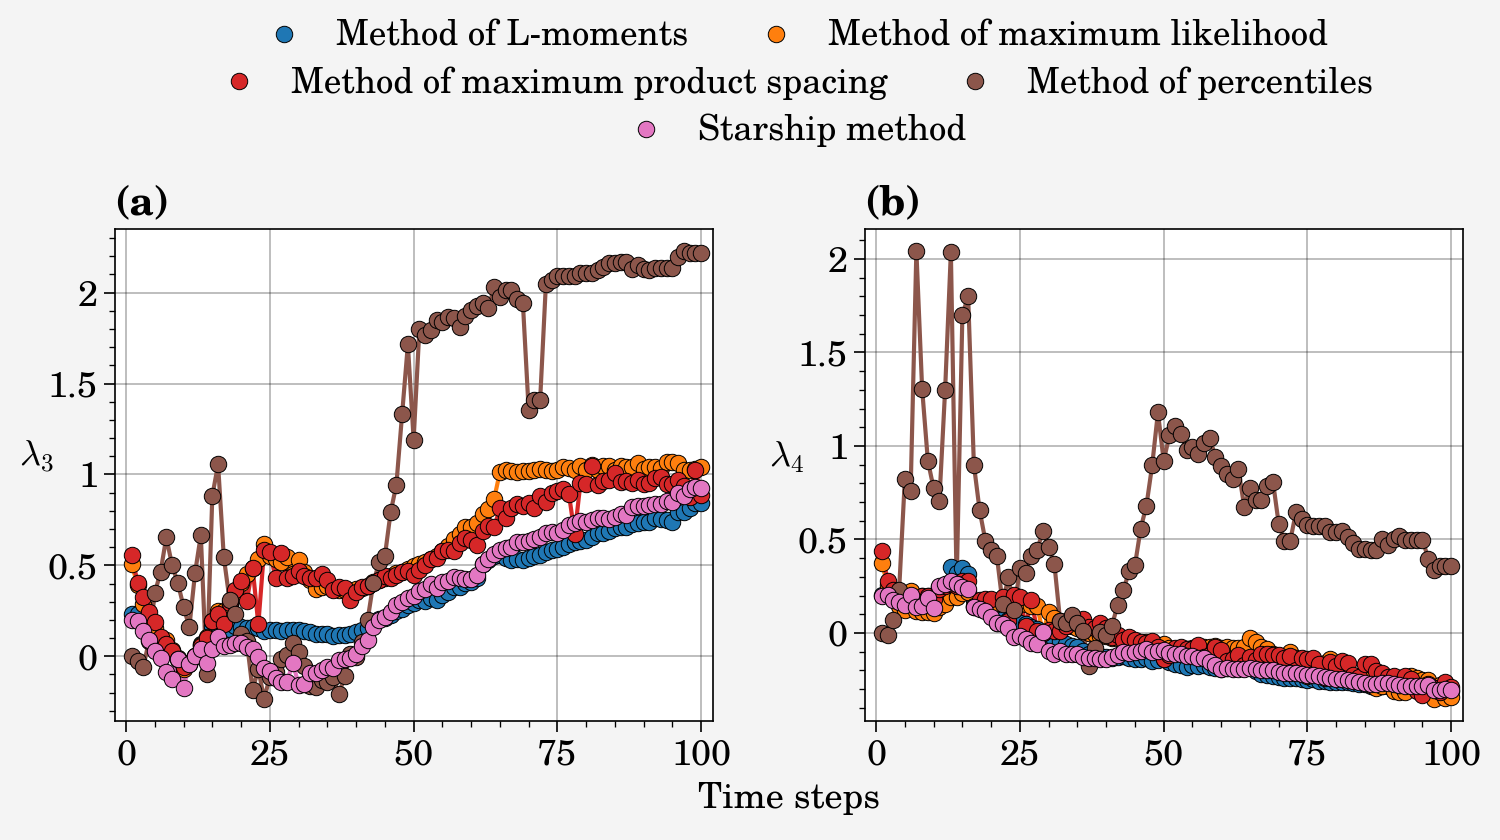

In [23]:
fit_files = sorted([f for f in os.listdir("data/data_sugarscape/GLD_fits/") if "time" in f 
                    and "starship_PM_fit" not in f 
                    and "starship_MM_fit" not in f
                    and "MPS_PM_fit" not in f
                    and "MPS_MM_fit" not in f
                    and "ML_PM_fit" not in f
                    and "ML_MM_fit" not in f
                    and f != "MM_fit_time.pickle"])


# labels = [str(t).replace("_fit_time.pickle", "") for t in fit_files]
labels = ["Method of L-moments", "Method of maximum likelihood", "Method of maximum product spacing",  
          "Method of percentiles", "Starship method"]

colors=mcp.gen_color(cmap="tab10", n=len(fit_files)+2)

fig, axs = pplt.subplots(ncols=2, nrows=1, figsize=(7.5, 4.2), sharex=True, sharey=False)

hs = []

for i, f in enumerate(fit_files):
    with open("data/data_sugarscape/GLD_fits/" + f, "rb") as f:
        lambdas, time = pickle.load(f)
        
    axs[0].scatter(np.linspace(1, 100, 100), lambdas[:, 2], s=35, 
                   edgecolor='k', color=colors[i], linewidth=0.35, zorder=3)
    axs[0].plot(np.linspace(1, 100, 100), lambdas[:, 2], color=colors[i])
    axs[0].set_xlabel('Time steps', fontsize=13) 
    axs[0].set_ylabel(r'$\lambda_3$', fontsize = 13,rotation='horizontal')
    
    h = axs[1].scatter(np.linspace(1, 100, 100), lambdas[:, 3], s=35, label=labels[i], 
                   edgecolor='k', color=colors[i], linewidth=0.35, zorder=3)
    hs.append(h)
    
    axs[1].plot(np.linspace(1, 100, 100), lambdas[:, 3], color=colors[i])
    axs[1].set_xlabel('Time steps', fontsize=1) 
    axs[1].set_ylabel(r'$\lambda_4$', fontsize = 13, rotation='horizontal')
    
    print(labels[i], ":", time)
    
fig.legend(hs, fontsize=12, ncols=2, frame=False, loc='top', center=True)

for ax in axs:
    ax.format(abc='(a)', fontsize = 13, xlim=(-2, 102))

plt.savefig("plots/GLD_fits/5_methods_fits.pdf", bbox_inches="tight")
plt.show()